<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/Udacity_Exercise_01%5D_Classification_Digit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets #updated

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.7/dist-packages (4.3.0)


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
import math

#Load the Dataset

In [ ]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Data Analysis

## Take A Peek on the Dataset

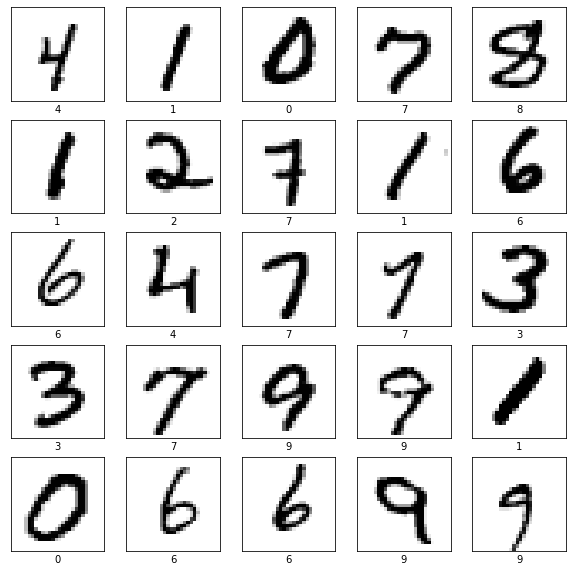

In [ ]:
i=0
plt.figure(figsize=(10,10))
for image, label_id in train_dataset.take(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image.numpy().reshape((28,28)), cmap=plt.cm.binary)
  plt.xlabel(label_id.numpy())
  i += 1
plt.show()

In [ ]:
for image, label_id in train_dataset.take(1):
  print("Image shape:", image.shape)

Image shape: (28, 28, 1)


# Build the model

## Assemble the model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

## Train the model

In [ ]:
BATCH_SIZE = 32
train_df = train_dataset.cache().repeat().shuffle(1000).batch(BATCH_SIZE)

In [ ]:
model.fit(train_df, epochs=5, steps_per_epoch=math.ceil(metadata.splits['train'].num_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2141 - accuracy: 0.9461
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1990 - accuracy: 0.9485
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1908 - accuracy: 0.9507
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1854 - accuracy: 0.9544
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1787 - accuracy: 0.9552


# Evaluate the model

In [ ]:
test_df = test_dataset.cache().batch(BATCH_SIZE)
history = model.evaluate(test_df)

313/313 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.9282


#Peek at the Predictions

In [ ]:
for test_images, test_labels in test_df.take(1):
  predictions = model.predict(test_images)

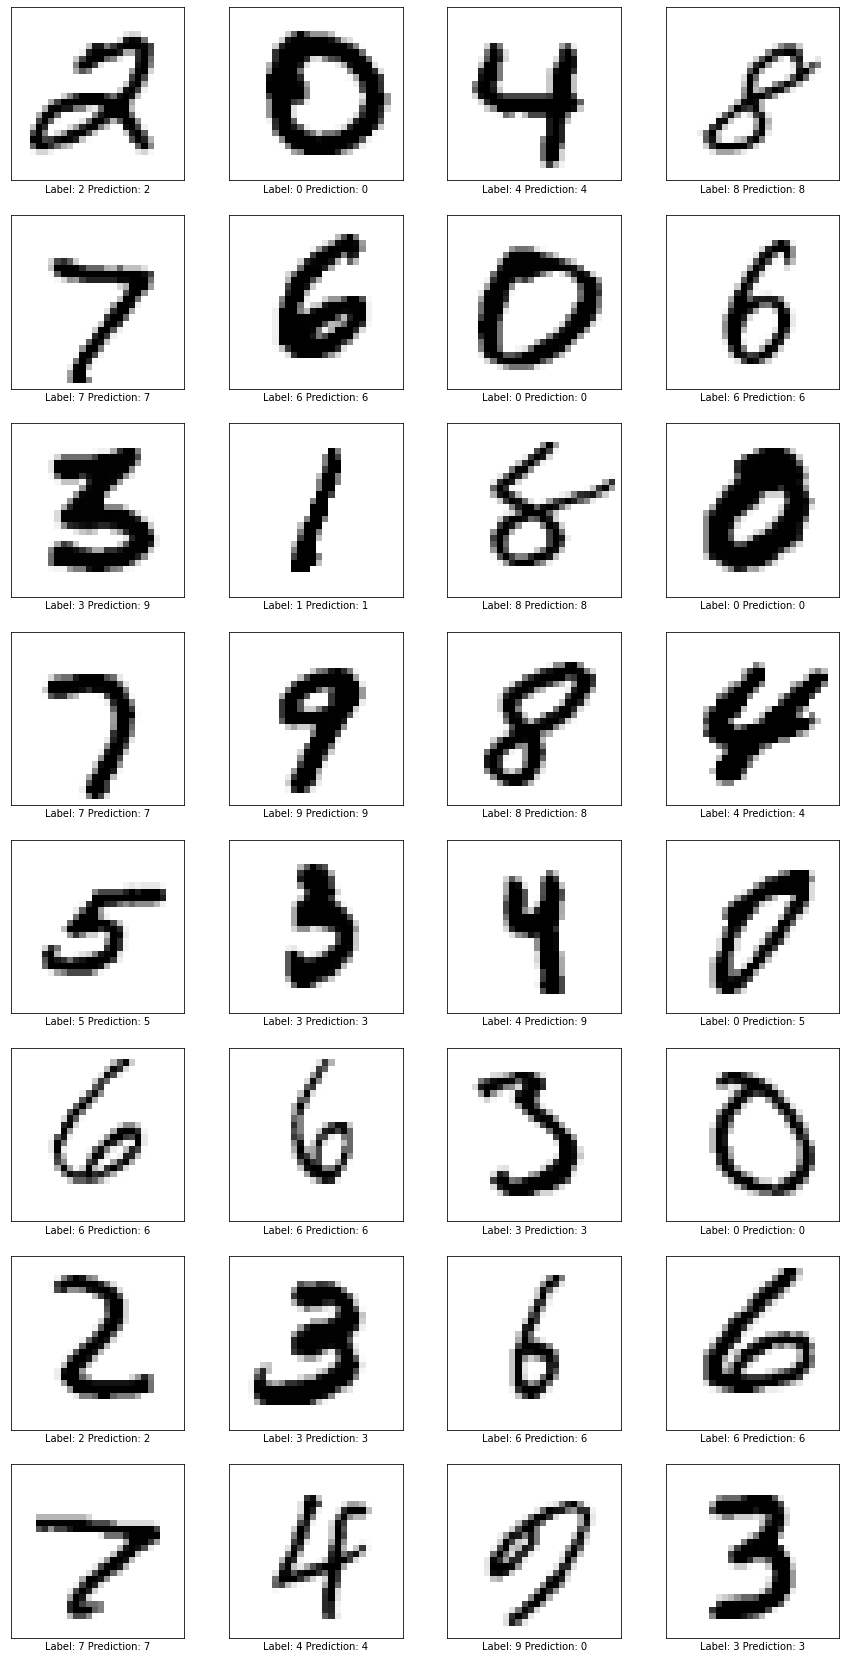

In [ ]:
plt.figure(figsize=(15,30))
index = 1
for test_image, test_label, prediction in zip(test_images, test_labels, predictions):
  plt.subplot(8, 4, index)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(test_image.numpy().reshape((28,28)), cmap=plt.cm.binary)
  predicted_value = np.argmax(prediction)
  plt.xlabel(f"Label: {test_label.numpy()} Prediction: {predicted_value}")
  index += 1
